# Import dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_dir = 'dataset/'
batch_size = 48
img_height = 144
img_width = 256

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 64080 files belonging to 3 classes.
Using 51264 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 64080 files belonging to 3 classes.
Using 12816 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Modern', 'Photoreal', 'Retro']


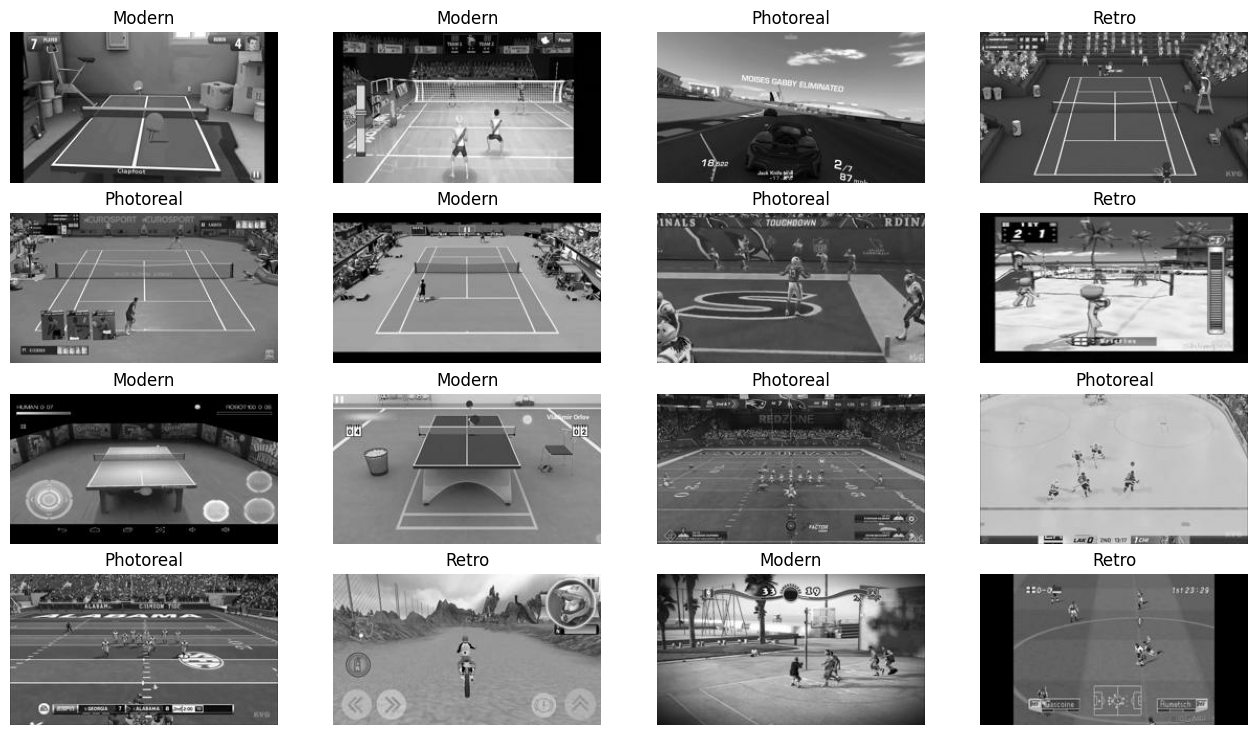

In [6]:
plt.figure(figsize=(16, 9))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].numpy().astype("uint8")
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

# NN Model

In [7]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_ds =  train_ds.map(normalize)
val_ds  =  val_ds.map(normalize)

train_ds =  train_ds.cache()
val_ds  =  val_ds.cache()

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(144, 256, 3)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10)

Epoch 1/10


  80/1068 [=>............................] - ETA: 6:27 - loss: 16.9740 - accuracy: 0.4656